## Cv.8. Vyhledávání v grafu

* Vyhledání optimální cesty grafu (Dijsktrův algoritmus, A* algoritmus)
* Vyhledání kostry grafu (Borůvkův algoritmus, Kruskalův algoritmus)

https://stackabuse.com/dijkstras-algorithm-in-python/

### 8.1 Vyhledání optimální cesty v grafu


#### Dijkstrův algoritmus

In [8]:
import heapq

def dijkstra(graf,pocatecni_uzel):

    vzdalenosti = {uzel:float('inf') for uzel in graf}
    vzdalenosti[pocatecni_uzel] = 0
    cesta = {uzel:None for uzel in graf}
    fronta = [(0,pocatecni_uzel)]
    
    while fronta:
        aktualni_vzdalenost, aktualni_uzel = heapq.heappop(fronta)
        for dalsi_uzel, vaha in graf[aktualni_uzel].items():
            docasna_vzdalenost = aktualni_vzdalenost+vaha
            if docasna_vzdalenost < vzdalenosti[dalsi_uzel]:
                vzdalenosti[dalsi_uzel] = docasna_vzdalenost
                cesta[dalsi_uzel] = aktualni_uzel
                heapq.heappush(fronta, (docasna_vzdalenost, dalsi_uzel))
    return vzdalenosti, cesta


def main():
    graf={
        'A':{'B':3,'C':1},
        'B':{'D':3,'C':1},
        'C':{'E':2},
        'D':{'C':1,'E':2},
        'E':{'F':1},
        'F':{'G':4, 'D':1},
        'G':{'E':1}
    }
    print(dijkstra(graf,'A'))

if __name__ == '__main__':
    main()

({'A': 0, 'B': 3, 'C': 1, 'D': 5, 'E': 3, 'F': 4, 'G': 8}, {'A': None, 'B': 'A', 'C': 'A', 'D': 'F', 'E': 'C', 'F': 'E', 'G': 'F'})


#### A* algoritmus

In [ ]:
!python3 -m pip install matplotlib

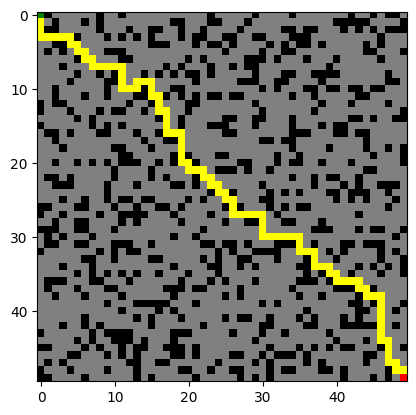

In [21]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import random

class Vrchol():

    def __init__(self, rodic=None, pozice=None):
        self.rodic = rodic
        self.pozice = pozice
        self.g = 0 #cena za presun z predchoziho do aktualniho uzlu
        self.h = 0 #heuristicka cena za presun do cile
        self.f = 0 #vysledna cena, tzn f = g + h

    def __eq__(self, other):
        return self.pozice == other.pozice


def astar(bludiste, zacatek, konec):
    otevrene_vrcholy = [] #OPEN
    uzavrene_vrcholy = [] #CLOSED
    pocatecni_vrchol = Vrchol(None, zacatek)
    konecny_vrchol = Vrchol(None, konec)

    # algoritmus zacina pridanim pocatecniho vrcholu do seznamu OPEN
    otevrene_vrcholy.append(pocatecni_vrchol)

    # hlavni vyklus hledani optimalni cesty, opakuje se do vyprazdneni seznamu OPEN
    while len(otevrene_vrcholy) > 0:

        # v seznamu OPEN nalezneme vrchol s nejmensi F-hodnotou (vysledna cena)
        aktualni_vrchol = otevrene_vrcholy[0]
        for vrchol in otevrene_vrcholy:
            if vrchol.f < aktualni_vrchol.f:
                aktualni_vrchol = vrchol

        # nalezeny vrchol vyjmeme ze seznamu OPEN a pridame ho do seznamu CLOSED
        otevrene_vrcholy.pop(otevrene_vrcholy.index(aktualni_vrchol))
        uzavrene_vrcholy.append(aktualni_vrchol)

        # pokud je aktualni vrchol zaroven cilem bludiste, tak vratime cestu
        if aktualni_vrchol == konecny_vrchol:
            cesta = []
            vrchol = aktualni_vrchol
            while vrchol is not None: #vem postupne vsechny vrcholy zpetne pomoci odkazu na rodice a pridej je do cesty
                cesta.append(vrchol.pozice)
                vrchol = vrchol.rodic
            return cesta[::-1] # vrat zpatky nalezenou optimalni cestu a obrat ji, at je od zacatku do cile

        # ziskej potomky aktualniho vrcholu (vsechny uzly kolem nej)
        potomci = []
        #for posun in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
        for posun in [(0, -1), (0, 1), (-1, 0), (1, 0)]:

            # souradnice potomka
            potomek_pozice = (aktualni_vrchol.pozice[0] + posun[0], aktualni_vrchol.pozice[1] + posun[1])

            # kontrola vyjeti z okraje bludiste
            if potomek_pozice[0] > (len(bludiste) - 1) or potomek_pozice[0] < 0 or \
            potomek_pozice[1] > (len(bludiste[len(bludiste)-1]) -1) or potomek_pozice[1] < 0:
                continue

            # kontrola prekazky
            if bludiste[potomek_pozice[0]][potomek_pozice[1]] == 1:
                continue

            # pridej potomka do seznamu potomku (Vrchol(rodice, pozice))
            potomci.append(Vrchol(aktualni_vrchol, potomek_pozice))

        # projdu vsechny potomky
        for potomek in potomci:

            # pokud je potomek v seznamu CLOSED, tak ho vynechame - uz jsme ho prochazeli
            for uzavreny_vrchol in uzavrene_vrcholy:
                if potomek == uzavreny_vrchol:
                    continue

            # spocitej potomka hodnoty g(rodic + 1), h(Pythagorska diagonalni vzdalenost od cile) a f
            potomek.g = aktualni_vrchol.g + 1
            potomek.h = ((potomek.pozice[0] - konecny_vrchol.pozice[0]) ** 2) + ((potomek.pozice[1] - konecny_vrchol.pozice[1]) ** 2)
            potomek.f = potomek.g + potomek.h

            # pokud je potomek jiz v seznamu OPEN a otevrel ho uzel s kratsi trasou, tak ho vynechame
            for otevreny_vrchol in otevrene_vrcholy:
                if potomek == otevreny_vrchol and potomek.g > otevreny_vrchol.g:
                    continue

            # pridej potomka do seznamu OPEN
            otevrene_vrcholy.append(potomek)


def vygeneruj_bludiste(nradku, nsloupcu, hustota_prekazek):
    return [[1 if random.random() < hustota_prekazek else 0 for j in range(nsloupcu)] for i in range(nradku)]

def bludiste_A():
    return [[0,1,0,0,0,1,0],
            [0,1,0,1,0,1,0],
            [0,1,0,1,0,0,0],
            [0,1,0,1,0,1,0],
            [0,1,0,1,0,1,0],
            [0,0,0,1,0,1,0]]

def bludiste_B():
    return [[0,0,0,0,0,0,0],
            [1,1,1,1,1,1,0],
            [0,0,0,0,0,1,0],
            [0,0,0,0,0,1,0],
            [0,0,0,0,0,1,0],
            [0,0,0,0,0,1,0]]

def bludiste_C():
    return [[0,0,0,0,0,0,0],
            [0,1,0,0,1,1,0],
            [0,0,1,1,0,1,0],
            [0,0,1,1,0,0,0],
            [0,0,0,1,0,1,1],
            [0,0,0,1,0,0,0]]


def vykresli_bludiste(bludiste, zacatek, konec, optimalni_cesta=None):
    #grey = volne policko, black = prekazka, green = zacatek, red = cil, yellow = optimalni cesta
    cmap = colors.LinearSegmentedColormap.from_list("", ["grey", "black", "green", "red", "yellow"])
    if optimalni_cesta:
        for pozice in optimalni_cesta:
            bludiste[pozice[0]][pozice[1]] = 4
    bludiste[zacatek[0]][zacatek[1]] = 2
    bludiste[konec[0]][konec[1]] = 3
    obrazek = plt.imshow(bludiste, cmap)


def main():
    bludiste = vygeneruj_bludiste(nradku=50, nsloupcu=50, hustota_prekazek=0.25)
    #bludiste = bludiste_C()
    zacatek = (0, 0)
    konec = (len(bludiste)-1, len(bludiste[0])-1)
    optimalni_cesta = astar(bludiste, zacatek, konec)
    vykresli_bludiste(bludiste, zacatek, konec, optimalni_cesta)


if __name__ == '__main__':
    main()

### 8.2 Vyhledání kostry grafu


#### Borůvkův algoritmus

#### Kruskalův algoritmus